In [5]:
# read the Titanic training data
import pandas as pd
path = '../data/'
url = path + 'train.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

In [6]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

In [7]:
# fill missing values for Embarked with the mode
titanic.Embarked.fillna('S', inplace=True)

In [8]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


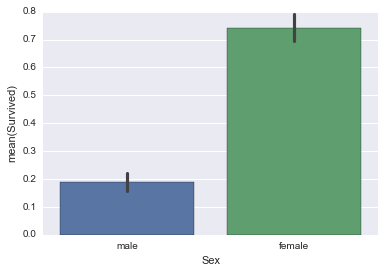

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic)

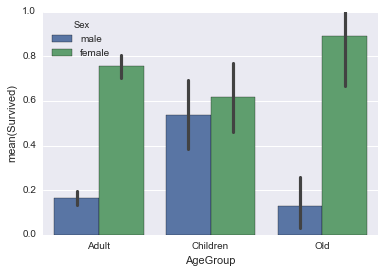

In [17]:
age_df = titanic[['Age','Survived', 'Sex']].copy()
age_df.loc[age_df.Age<15,'AgeGroup'] = 'Children'
age_df.loc[(age_df.Age>=15) & (age_df.Age<55),'AgeGroup'] = 'Adult'
age_df.loc[age_df.Age>55,'AgeGroup'] = 'Old'

sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=age_df)

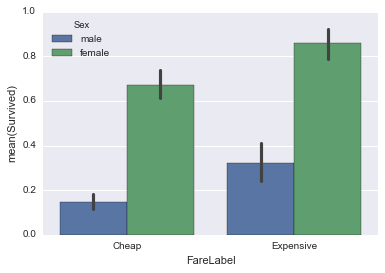

In [11]:
money_df = titanic[['Fare','Survived', 'Sex','Pclass']].copy()
money_df.loc[money_df.Fare>30,'FareLabel'] = 'Expensive'
money_df.loc[money_df.Fare<30,'FareLabel'] = 'Cheap'
sns.barplot(x='FareLabel', y='Survived', hue='Sex', data=money_df)

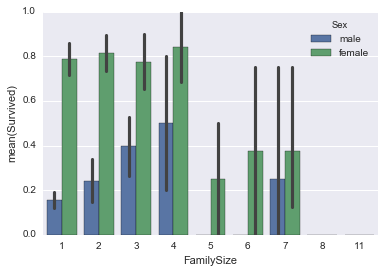

In [12]:
family_df = titanic[['SibSp','Parch','Survived', 'Sex']].copy()
family_df.loc[:,'FamilySize'] =  family_df['SibSp'] + family_df['Parch'] +1
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=family_df)

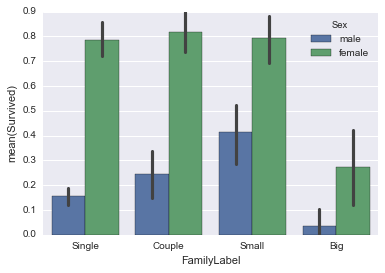

In [13]:
family_df.loc[family_df.FamilySize==1,'FamilyLabel'] = 'Single'
family_df.loc[family_df.FamilySize==2,'FamilyLabel'] = 'Couple'
family_df.loc[(family_df.FamilySize>2)&(family_df.FamilySize<=4),'FamilyLabel'] = 'Small'
family_df.loc[family_df.FamilySize>4,'FamilyLabel'] = 'Big'
sns.barplot(x='FamilyLabel', y='Survived', hue='Sex', data=family_df, order=['Single', 'Couple', 'Small', 'Big'])

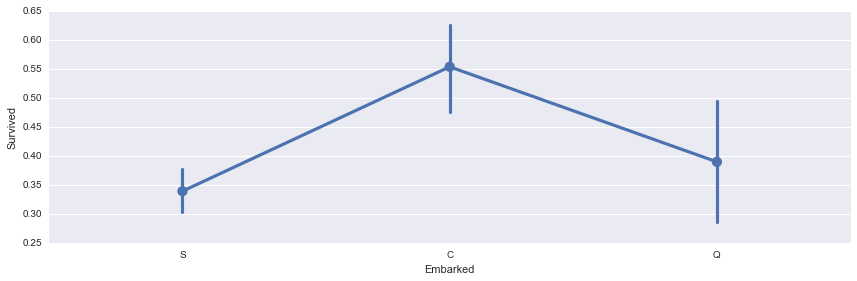

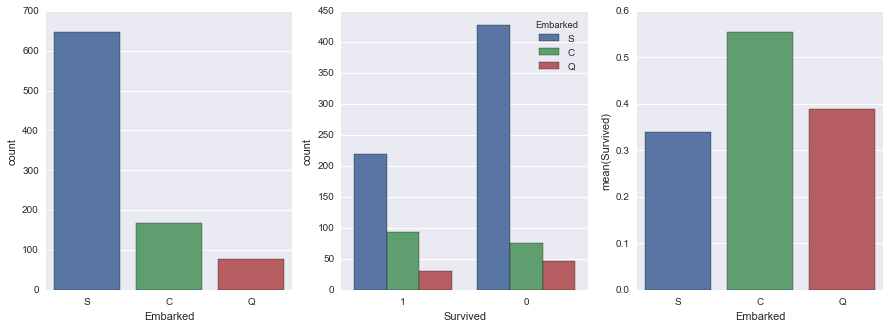

In [14]:
# plot
sns.factorplot('Embarked','Survived', data=titanic,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)